# Formants are easy to measure; resonances, not so much: Lessons from Klatt (1986)
### D. H. Whalen, Wei-Rong Chen, Christine H. Shadle, Sean A. Fulop
#### August 2022 (JASA)

### One-liner
Current methods of formant tracking (e.g., LPC analysis, manual spectrogram labeling) are unable to produce highly accurate tracks (<50Hz error) due to the difficulty of disentangling resonance information from harmonic structure.

### Defining Terms
**formant** - 
local maxima in the wideband sound spectrum \
**vocal tract resonance** - 
the resonance characteristics of a configuration of the vocal tract - particularly important for vowel identification \
**wideband spectrogram** - 
uses filters with a wide bandwidth to get spectral "snapshots" - blend frequencies so harmonic structure isn't clearly visible \
**narrowband spectrogram** - 
uses filters with a narrow bandwidth to get spectral "snapshots" - less blending so local maxima of harmonic structure are preserved and apparent \
**reassigned spectrogram** - 
uses instantaneous times and frequencies of impulsive events and line components to make vocal tract resonances more apparent

### Notes
#### Possible Contributing Factors to Low Accuracy
- proximity to another formant
- high F0 more difficult to track
- LPC order and other parameters may not be dialed in to speaker characteristics
#### Author Recommendations
- acknowledge limitations of current analyses regarding influence of F0 and limits of granularity (round to nearest 10 Hz when reporting and accept that variation < 50 Hz may be systematic error)
- report settings more fully
- justify chosen settings
- examine the pattern of F0 vs F1 for possible harmonic bias
- use reassigned spectrograms to manually track formants for highest accuracy

### Demonstration

This is a work in progress...

(45, 73)


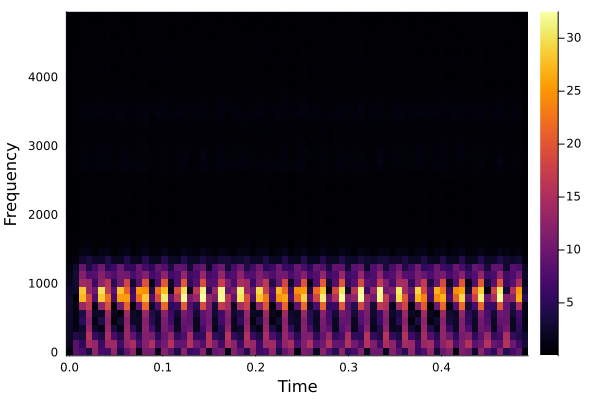

In [1]:
using Random
using Plots
using FFTW
using WAV

signal, fs, b, opt = wavread("demo_data/aa_audio/audio_lpc_aa_fo100.wav")

# Parameters for spectrogram
window_size = 400
overlap = 100

function compute_spectrogram(signal, window_size, overlap)
    num_windows = div(length(signal) - window_size, window_size - overlap) + 1
    spectrogram = []

    for i in 1:num_windows
        start_idx = (i - 1) * (window_size - overlap) + 1
        end_idx = start_idx + window_size - 1
        window = signal[start_idx:end_idx]
        windowed_signal = window .* hanning(window_size)
        spectrum = abs.(fft(windowed_signal)[1:div(window_size,2)])
        push!(spectrogram, spectrum)
    end

    return hcat(spectrogram...), num_windows
end

function hanning(size)
    return 0.5 * (1 .- cos.(2π * (0:size-1) ./ (size-1)))
end

spectrogram, num_windows = compute_spectrogram(signal, window_size, overlap)

n_samp = length(signal)
time_step = (window_size - overlap) / fs
t = 0:time_step:time_step * (num_windows - 1)  # Time vector

# Define the maximum frequency you want to display
fc = 5000 # in Hz

# Convert fc to corresponding matrix index
max_index = Int(round(fc * size(spectrogram, 1) / (fs / 2)))

# Slice the spectrogram matrix to keep only the lower frequencies
spectrogram = spectrogram[1:max_index, :]
println(size(spectrogram))

f = 1:fc/size(spectrogram, 1):fc

heatmap(t, f, spectrogram, xlabel="Time", ylabel="Frequency")

In [2]:
# anim = Animation()

# step = 1
# wn = range(start=-100, step=step, stop=-20)
# nw = range(start=20, step=step, stop=100)
# r = [wn; nw]

# for window_size in r
#     window_size = abs.(window_size)
#     overlap = Int.(round(window_size / 2))
#     spectrogram = compute_spectrogram(signal, window_size, overlap)
#     heatmap(spectrogram, xlabel="Time", ylabel="Frequency", title="Spectrogram (window size = $window_size)")
#     frame(anim)
# end

# gif(anim, "figures/spectrogram.gif", fps=60)